In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [2]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/test/
   creating: dataset/test/1/
  inflating: dataset/test/1/1.jpg    
  inflating: dataset/test/1/10.jpg   
  inflating: dataset/test/1/100.jpg  
  inflating: dataset/test/1/101.jpg  
  inflating: dataset/test/1/102.jpg  
  inflating: dataset/test/1/103.jpg  
  inflating: dataset/test/1/104.jpg  
  inflating: dataset/test/1/105.jpg  
  inflating: dataset/test/1/106.jpg  
  inflating: dataset/test/1/107.jpg  
  inflating: dataset/test/1/108.jpg  
  inflating: dataset/test/1/109.jpg  
  inflating: dataset/test/1/11.jpg   
  inflating: dataset/test/1/110.jpg  
  inflating: dataset/test/1/111.jpg  
  inflating: dataset/test/1/112.jpg  
  inflating: dataset/test/1/113.jpg  
  inflating: dataset/test/1/114.jpg  
  inflating: dataset/test/1/115.jpg  
  inflating: dataset/test/1/116.jpg  
  inflating: dataset/test/1/117.jpg  
  inflating: dataset/test/1/118.jpg  
  inflating: dataset/test/1/119.jpg  
  inflating: dataset/test/

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [4]:
train_data = keras.utils.image_dataset_from_directory(
    directory = "/content/dataset/train",
    labels = "inferred",
    label_mode = "int",
    image_size = (256, 256),
    batch_size = 32
)

test_data = keras.utils.image_dataset_from_directory(
    directory = "/content/dataset/test",
    labels = "inferred",
    label_mode = "int",
    image_size = (256, 256),
    batch_size = 32
)

Found 2264 files belonging to 3 classes.
Found 470 files belonging to 3 classes.


In [5]:
def normalization(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_data = train_data.map(normalization)
test_data = test_data.map(normalization)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
    )

In [11]:
model = Sequential()

model.add(Conv2D(128, (3, 3), activation = "relu", input_shape = (256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation = "relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(3, activation = "softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [13]:
history = model.fit(train_data, epochs = 50, validation_data = test_data, callbacks=callback)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 35s 433ms/step - accuracy: 0.9423 - loss: 0.3783 - val_accuracy: 0.9830 - val_loss: 0.0863
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - accuracy: 0.9940 - loss: 0.0250 - val_accuracy: 0.9830 - val_loss: 0.0556
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - accuracy: 0.9965 - loss: 0.0124 - val_accuracy: 0.9809 - val_loss: 0.0560
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 196ms/step - accuracy: 0.9934 - loss: 0.0172 - val_accuracy: 0.9809 - val_loss: 0.0346
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - accuracy: 0.9963 - loss: 0.0088 - val_accuracy: 0.9830 - val_loss: 0.0315
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - accuracy: 0.9969 - loss: 0.0089 - val_accuracy: 0.9851 - val_loss: 0.0396
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 186ms/step - accuracy: 0.9966 - loss: 0.0061 - val_accuracy: 0.9830 - val_loss: 0.0477
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - accuracy: 0.9977 - loss: 0.0046 - val_accu

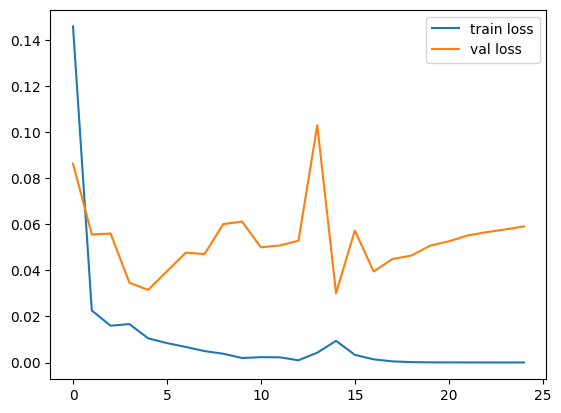

<Figure size 640x480 with 0 Axes>

In [14]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

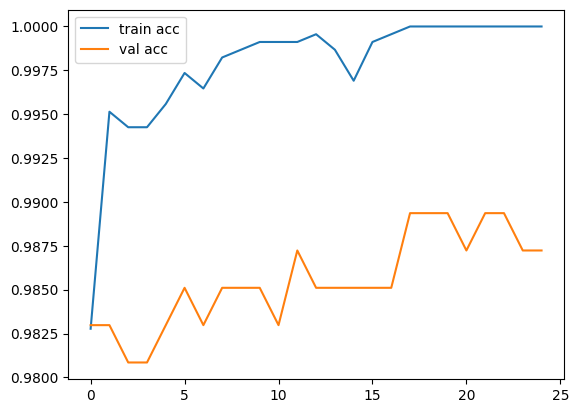

<Figure size 640x480 with 0 Axes>

In [15]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
#

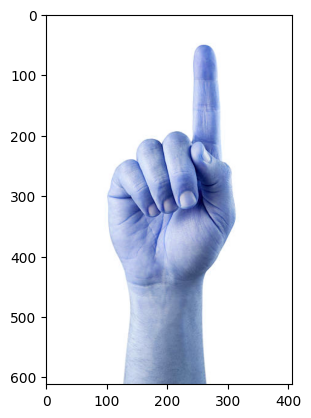

In [25]:
import cv2

img = cv2.imread("/content/1.jpg")
resize_img = cv2.resize(img, (256, 256))

plt.imshow(img)
plt.show()

In [26]:
resize_img.shape
test_image = resize_img.reshape(1, 256, 256, 3)
prediction = model.predict(test_image)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0., 1., 0.]], dtype=float32)

**After data augumentation**


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip = True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/dataset/train',
        target_size=(255, 255),
        batch_size=batch_size,
        class_mode='sparse')

test_generator = test_datagen.flow_from_directory(
        '/content/dataset/test',
        target_size=(255, 255),
        batch_size=batch_size,
        class_mode='sparse')

Found 2264 images belonging to 3 classes.
Found 470 images belonging to 3 classes.


In [ ]:
model.fit(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=test_generator,
        validation_steps=800 // batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 35s 249ms/step - accuracy: 0.8847 - loss: 0.6741 - val_accuracy: 0.9936 - val_loss: 0.0207
Epoch 2/50
  1/125 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 1.0000 - loss: 0.0443

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9913 - loss: 0.0234 - val_accuracy: 0.9894 - val_loss: 0.0206
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 28s 226ms/step - accuracy: 0.9963 - loss: 0.0098 - val_accuracy: 0.9894 - val_loss: 0.0221
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9915 - loss: 0.0252 - val_accuracy: 0.9936 - val_loss: 0.0199
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 38s 235ms/step - accuracy: 0.9937 - loss: 0.0140 - val_accuracy: 0.9894 - val_loss: 0.0230
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 1.0000 - loss: 9.2254e-04 - val_accuracy: 0.9915 - val_loss: 0.0228
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 230ms/step - accuracy: 0.9957 - loss: 0.0118 - val_accuracy: 0.9872 - val_loss: 0.0308
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 1.0000 - loss: 1.1037e-04 - val_accuracy: 0.9872 - val_loss: 0.0317
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 36s 223ms/step - accuracy: 0.9971 - loss: 0.0079 - val

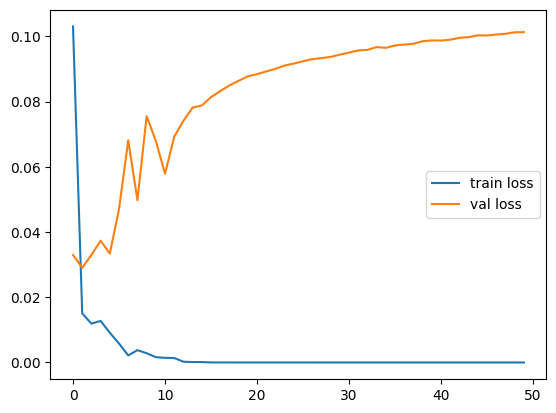

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

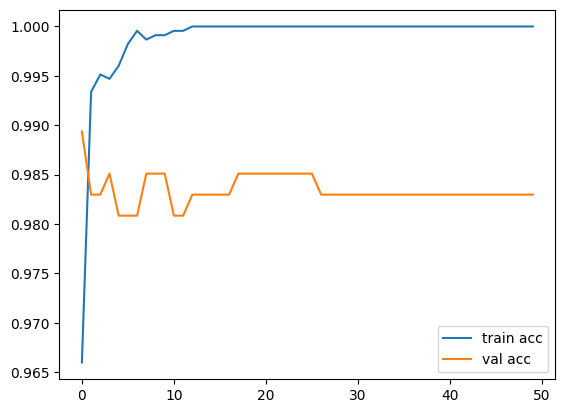

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
#

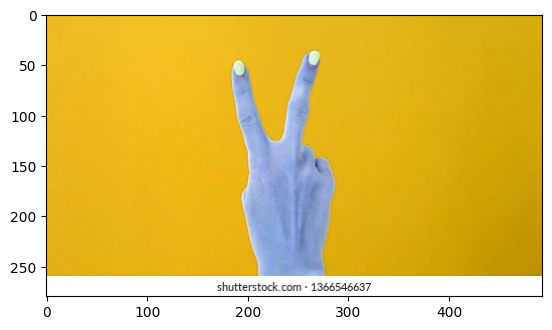

In [ ]:
import cv2

img = cv2.imread("/content/2.webp")
resize_img = cv2.resize(img, (256, 256))

plt.imshow(img)
plt.show()

In [ ]:
resize_img.shape
test_image = resize_img.reshape(1, 256, 256, 3)
prediction = model.predict(test_image)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0., 1., 0.]], dtype=float32)

In [8]:
from tensorflow.keras.models import load_model
import cv2


model_load = load_model("model.keras", compile=False)

img = cv2.imread(r"D:\study\projects\CNN\gesture_control\2.webp")
resize_img = cv2.resize(img, (256, 256))

plt.imshow(img)
plt.show()

test_image = resize_img.reshape(1, 256, 256, 3)
prediction = model_load.predict(test_image)
prediction

TypeError: Error when deserializing class 'InputLayer' using config={'batch_shape': [None, 256, 256, 3], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_layer'}.

Exception encountered: Unrecognized keyword arguments: ['batch_shape']